## GSVA Consensus Clustering
Generally used for Figure 2

Author: Max Gold

In [23]:
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy import stats

In [24]:
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Helvetica"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

### Load data

In [25]:
base_folder = '../data/'

In [26]:
kdf = pd.read_csv(os.path.join(base_folder, "FINAL_GSVA_genesigs100.csv.gz"), index_col=0 )

In [27]:
ccdf = pd.read_csv(os.path.join(base_folder, "ccres_gn-100_per-0.5.csv"), index_col=0)
ivals = [x.replace("WHO", "Consensus") for x in kdf.index]
ccdf.columns=ivals
ccdf.index =ivals

## Setup Plot for Figure 2B

In [28]:
assays = [x.split("_")[0] for x in ccdf.index]

In [29]:
sorted(set(assays))

['Archer',
 'Consensus',
 'Human',
 'Korshunov',
 'MBEN-Cell',
 'MBEN-Nuc',
 'Mouse',
 'Riemondy']

In [30]:
lut = dict(zip(sorted(set(assays)), ['red', 'darkslategrey', 'royalblue', 'maroon', 'indigo', 'black', 'darkblue', 'brown']))
row_colors = [lut[x] for x in assays]

In [31]:
mouse_assays = ['Mouse']
bulk_assays = ['Korshunov', 'Consensus', 'Archer']
healthy_assays = ['Human', 'Mouse']
mouse_labels = ['Mouse' if x in mouse_assays else 'Human' for x in assays]
healthy_labels = ['Healthy' if x in healthy_assays else 'Tumor' for x in assays]
bulk_labels = ['Bulk' if x in bulk_assays else 'Single-Nuc' if ('Nuc' in x) else 'Single-Cell' for x in assays]

In [32]:
## colors
mouse_dict = {'Mouse': 'darkolivegreen', 'Human': 'darkseagreen'}
healthy_dict = {'Healthy': 'steelblue', 'Tumor': 'lightskyblue'}
bulk_dict = {'Bulk': 'lightgray', 'Single-Cell': 'darkgray', 'Single-Nuc': 'slategray'}

bulk_vals = [bulk_dict[x] for x in bulk_labels]
healthy_vals = [healthy_dict[x] for x in healthy_labels]
mouse_vals = [mouse_dict[x] for x in mouse_labels]
assay_vals= [lut[x] for x in assays]

In [33]:
## Rename to simpler names
nd = {'Archer_SHHa': 'SHHa',
 'Archer_SHHb': 'SHHb',
 'Consensus_SHH-3(α)': 'SHH-3(α)' ,
 'Consensus_SHH-1(β)': 'SHH-1(β)',
 'Consensus_SHH-4(δ)': 'SHH-4(δ)',
 'Consensus_SHH-2(γ)': 'SHH-2(γ)',
 'Korshunov_TCL1': 'TCL1',
 'Korshunov_TCL2': 'TCL2',
 'Riemondy_A1': 'SHH-A1',
 'Riemondy_A2': 'SHH-A2',
 'Riemondy_B1': "SHH-B1",
 'Riemondy_B2': 'SHH-B2',
 'Riemondy_C1': 'SHH-C1',
 'Riemondy_C2': "SHH-C2",
 'Human_GCP': 'Hum-GCP',
 'Human_GC-early': 'Hum-GN-diff1',
 'Human_GC-middle': 'Hum-GN-diff2',
 'Human_GC-late': 'Hum-GN-defined',
 'MBEN-Cell_2': 'MBEN-Cell-2',
 'MBEN-Cell_4': 'MBEN-Cell-4',
 'MBEN-Cell_5': 'MBEN-Cell-5',
 'MBEN-Cell_3': 'MBEN-Cell-3',
 'MBEN-Cell_0': 'MBEN-Cell-0',
 'MBEN-Cell_1': 'MBEN-Cell-1',
 'MBEN-Nuc_Ribosomal': 'MBEN-Ribo',
 'MBEN-Nuc_GCP-SHH': 'MBEN-GCP',
 'MBEN-Nuc_GN-Migrating': 'MBEN-GN-Mig',
 'MBEN-Nuc_GN-Postmigratory': 'MBEN-GN-Postmig',
 'MBEN-Nuc_GN-Premigratory': 'MBEN-GN-Premig',
 'MBEN-Nuc_GCP-Cycling': 'MBEN-GCP-Cyc',
 'Mouse_GN-Migrating': "Mus-GN-Mig",
 'Mouse_GCP-Cycling': 'Mus-GCP-Cyc',
 'Mouse_GN-Premigratory': 'Mus-GN-Premig',
 'Mouse_GCP': 'Mus-GCP',
 'Mouse_GN-Postmigratory': 'Mus-GN-Postmig'}

In [34]:
fdfo = ccdf.copy()
fdfo.index = [nd[x] for x in fdfo.index]
fdfo.columns = [nd[x] for x in fdfo.columns]

In [35]:
cold = dict([[row, row_colors[index]] for index,row in enumerate(fdfo.columns)])

In [36]:
## create colormap that makes 0 different
colors1 = plt.cm.binary(np.linspace(0.,0.00001,1))
colors2 = plt.cm.Reds(np.linspace(0.00001,1,128))
colors = np.vstack((colors1[-1],colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

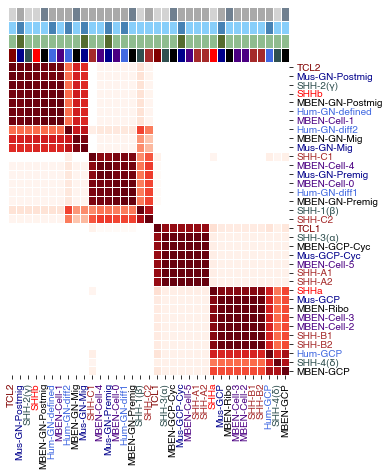

In [37]:
## make big plot
cg = sns.clustermap(fdfo, cmap=mymap , yticklabels=True, xticklabels=True, figsize=(6.5,8), metric='correlation', 
                    col_colors=[ bulk_vals, healthy_vals, mouse_vals,assay_vals], linewidths=1, annot_kws={"size": 12})
cg.ax_col_dendrogram.set_visible(False)
cg.ax_row_dendrogram.set_visible(False)
cg.ax_cbar.set_visible(False)
for tick_label in cg.ax_heatmap.axes.get_yticklabels():
    tick_text = tick_label.get_text()
    a = tick_text.split("_")[0]
#     species_name = assays.loc[int(tick_text)]
#     tick_label.set_color(lut[a])
    tick_label.set_color(cold[a])

    
for tick_label in cg.ax_heatmap.axes.get_xticklabels():
    
    tick_text = tick_label.get_text()
    a = tick_text.split("_")[0]
#     species_name = assays.loc[int(tick_text)]
#     tick_label.set_color(lut[a])
    tick_label.set_color(cold[a])
    
# cg.vline([0,1,2])

# plt.savefig("pdf_arial_figures/fig2_heatmap.pdf", dpi=300, bbox_inches='tight', rasterize=True)
# plt.savefig("../fig2_trial_716.pdf", dpi=300, bbox_inches='tight', rasterize=True)
# plt.savefig("../fig2_trial_716.eps", dpi=300, bbox_inches='tight', )

### Create Supplemental Plot for all combos (Supp Figure 2D)

In [15]:
def plot_image(ccdf):
    assays = [x.split("_")[0] for x in ccdf.index]

    sorted(set(assays))

#     lut = dict(zip(sorted(set(assays)), ['red', 'darkslategrey' ,'royalblue', 'maroon', 'indigo', 'black', 'darkblue', 'brown']))
#     row_colors = [lut[x] for x in assays]

    cg = sns.clustermap(ccdf, cmap=mymap,  yticklabels=True, xticklabels=False, figsize=(10,9))
    cg.ax_col_dendrogram.set_visible(False)
    cg.ax_row_dendrogram.set_visible(False)
    cg.cax.set_visible(False)

    for tick_label in cg.ax_heatmap.axes.get_yticklabels():
        tick_text = tick_label.get_text()
        
        a = tick_text.split("_")[0]
        tick_label.set_color(cold[a])
    return cg

In [16]:
## Generate Figure

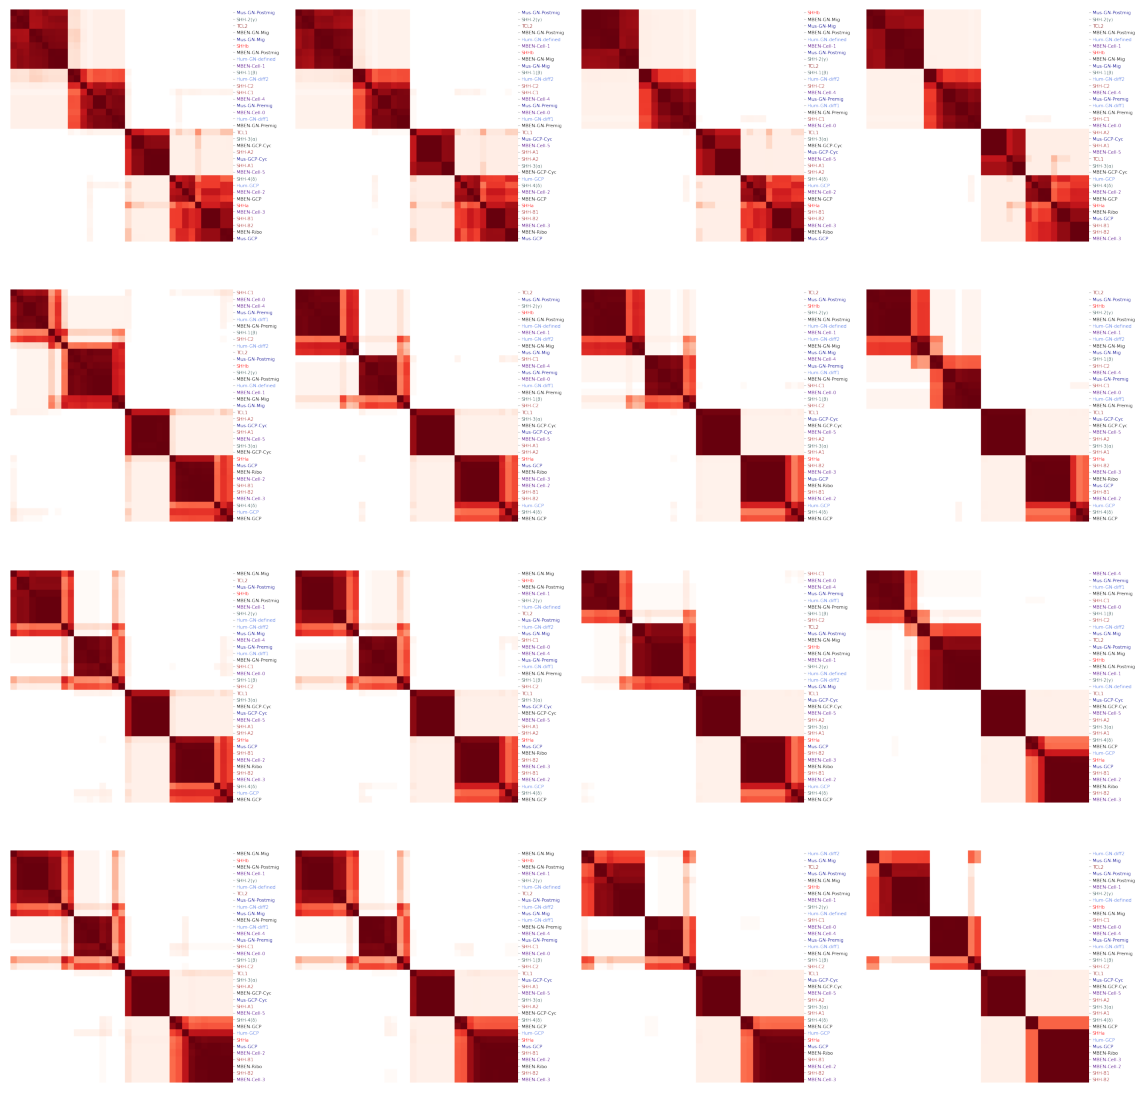

In [17]:
perl = ['30', '50', '70', '90']
perl = ['0.3', '0.5', '0.7', '0.9']
gsvl = ['50', '100', '150', '200']

nn = 4
fig,axes = plt.subplots(len(gsvl), len(perl), figsize=( nn*len(perl),nn*len(gsvl)))

for i,per in enumerate(perl):
    for ii,gsv in enumerate(gsvl):
        file = 'ccres_gn-' + gsv + '_per-' + per + '.csv'
        ccdf = pd.read_csv(os.path.join(base_folder, 'cc_results/' + file), index_col=0)
        ivals = [x.replace("WHO", "Consensus") for x in kdf.index]
        ccdf.columns=ivals
        ccdf.index =ivals          

        ccdf.index = [nd[x] for x in ccdf.index]
        ccdf.columns = [nd[x] for x in ccdf.columns]        
      
        fg = plot_image(ccdf)
        fg.savefig('g0.png')
        plt.close(fg.fig)
        axes[ii][i].imshow(mpimg.imread('g0.png'))
        
[ax.set_axis_off() for ax in axes.ravel()]

plt.tight_layout()
# plt.savefig("../ccres_sup_716.png", dpi=300)
# plt.savefig("../ccres_sup_716.pdf", dpi=300)
plt.show()
